# Логистическая регрессия

odd ration = p/(1-p)
"Отношение шансов" = вероятность наступления события / вероятность его ненаступления
logit(p) = log[p/(1-p)]

logit(p) принимает значения от 0 до 1 и трансформирует их в значения по всему вещественному диапазону, который можно использовать для для выражения лиейной связи между входными значениями признаков и логарифмами отношения шансов:
logit(p(y=1|x)) = w0x0 + w1x1 + ... + wmxm = w.T*x

p(y=1|x) - условная вероятность того, что отдельно взятый объект принадлежит к классу 1

Нас интересует обратная функция к логит (показывающая вероятность того, что объект принадлежит к классу):

Логистическая функция или сигмоида:

p = 1/(1+exp(-z))

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

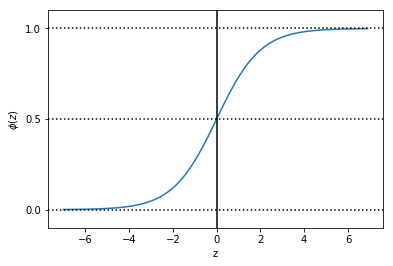

In [3]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.axhline(y=1, ls='dotted', color='k')
plt.axhline(y=0, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

Используя сигмоиду как функцию активации, а затем квантизатор:
y = 1 , если p>=0.5 , иначе 0
Получим персептрон, который уже строили ранее.
Но преимущество сигмоиды в том, что можно получить вероятность того , что ответ правильный.

Правдоподобие L - функция, Которую хотим максимизировать, принимая, что отдельные образцы независимы друг от друга
L(w) = P(y|x;w) = П(от i=1 до n) P(y[i]|x[i];w) = П(1..n) p(z[i])^(y[i]) * (1-p(z[i])^(1-y[i])

Максимизировать проде логарифи:
-J = log L = Сумма(y[i]*log(p(z[i]) + (1-y[i])*log(1-p(z[i])))

Для максимизации -J можно, как вариант, минимизировать методом градиентного спуска J (J - функция стоимости)

Если нарисовать график J, то станит видно , что когда мы неправильно определяем класс, то ,т.к. обнуляется часть J с большей p под log-мом , будем получать штраф, тем больший , чем сильнее были уверены при выборе ответа (или чем слабее были уверены в правильном ответе)

In [4]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)

In [5]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Маштабирование признаков
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
lr.fit(X_train_std, y_train)


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx), marker= markers[idx], label=cl)
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0,
                       linewidths=1, marker='o', s=55, label='тестовый набор')

In [8]:
X_combined_std = np.vstack((X_train, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr,
                     test_idx=range(105,150))

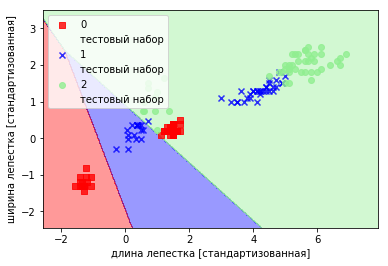

In [9]:
plt.xlabel('длина лепестка [стандартизованная]')
plt.ylabel('ширина лепестка [стандартизованная]')
plt.legend(loc='upper left')
plt.show()

In [11]:
lr.predict_proba(np.array([X_test_std[0,:]]))

array([[2.05743774e-11, 6.31620264e-02, 9.36837974e-01]])

# Регуляризация
Обычно проявдяется в том, что появляются слишком большие веса, поэтому для борьбы с ним можно просто добавить шртраф за их размер - регуляризация

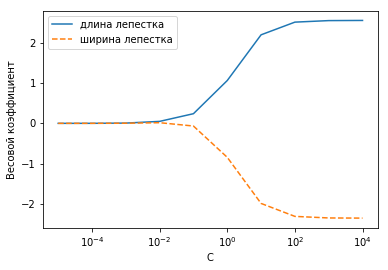

In [23]:
weights, params = [], []
for c in range(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='длина лепестка')
plt.plot(params, weights[:, 1], label='ширина лепестка', linestyle='--')
plt.ylabel('Весовой коэффициент')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()